# Document Computationnel : Sujet 7 - Autour du SARS-CoV-2 (Covid-19)
- Dernière modification : *01/06/2020*
- Langage utilisé : *Python*

## Table des matières 

1. [Résumé / *abstract*](#résumé)
2. [Importation des données](#importation-des-données)
3. [Formatage des données](#formatage-des-données)
4. [Traitement des données](#traitement-des-données)
5. [Elément complémentaire](#etude-complémentaire)
6. [Conclusion](#conclusion)

---

# Résumé

Vous trouverez dans ce notebook le cheminement nécessaire pour représenter une figure semblable à celle présente sur le site du [South China morning post](https://www.scmp.com/coronavirus?src=homepage_covid_widget). Toutes les étapes sont décrites et commentées. 

---

# Importation des données

## Sources :

* Graphique exemple de [South Chine Morning Post](https://www.scmp.com/coronavirus?src=homepage_covid_widget). Datant du 20 Mai 2020.
* Données brutes utilisées dans ce document : [time_series_covid19_confirmed_global.csv](https://raw.githubusercontent.com/CSSEGISandData/COVID-19/master/csse_covid_19_data/csse_covid_19_time_series/time_series_covid19_confirmed_global.csv)


On procède à un test afin de savoir si les données sont disponibles en local ou si l'on doit utiliser l'URL d'origine.

In [1]:
%matplotlib inline
import matplotlib.pyplot as plt
import pandas as pd
import numpy as np
#import isoweek not needed here

data_url = "https://raw.githubusercontent.com/CSSEGISandData/COVID-19/master/csse_covid_19_data/csse_covid_19_time_series/time_series_covid19_confirmed_global.csv"

In [2]:
# Local data 
localData = "time_series_covid19_confirmed_global.csv"

In [3]:
import os
import urllib.request

if os.path.exists(localData):
    raw_data = pd.read_csv(localData)
    print("Local File Selected")
else :
    urllib.request.urlretrieve(data_url, data_data)
    raw_data = pd.read_csv(data_url)
    print("Online File Selected")
        
raw_data

Local File Selected


Province/State          Country/Region        Lat  \
0                                 NaN             Afghanistan  33.000000   
1                                 NaN                 Albania  41.153300   
2                                 NaN                 Algeria  28.033900   
3                                 NaN                 Andorra  42.506300   
4                                 NaN                  Angola -11.202700   
5                                 NaN     Antigua and Barbuda  17.060800   
6                                 NaN               Argentina -38.416100   
7                                 NaN                 Armenia  40.069100   
8        Australian Capital Territory               Australia -35.473500   
9                     New South Wales               Australia -33.868800   
10                 Northern Territory               Australia -12.463400   
11                         Queensland               Australia -28.016700   
12                    South Australia               Australia -34.928500   
13                           Tasmania               Australia -41.454500   
14                           Victoria               Australia -37.813600   
15                  Western Australia               Australia -31.950500   
16                                NaN                 Austria  47.516200   
17                                NaN              Azerbaijan  40.143100   
18                                NaN                 Bahamas  25.034300   
19                                NaN                 Bahrain  26.027500   
20                                NaN              Bangladesh  23.685000   
21                                NaN                Barbados  13.193900   
22                                NaN                 Belarus  53.709800   
23                                NaN                 Belgium  50.833300   
24                                NaN                   Benin   9.307700   
25                                NaN                  Bhutan  27.514200   
26                                NaN                 Bolivia -16.290200   
27                                NaN  Bosnia and Herzegovina  43.915900   
28                                NaN                  Brazil -14.235000   
29                                NaN                  Brunei   4.535300   
..                                ...                     ...        ...   
236                               NaN             Timor-Leste  -8.874217   
237                               NaN                  Belize  13.193900   
238                               NaN                    Laos  19.856270   
239                               NaN                   Libya  26.335100   
240                               NaN      West Bank and Gaza  31.952200   
241                               NaN           Guinea-Bissau  11.803700   
242                               NaN                    Mali  17.570692   
243                               NaN   Saint Kitts and Nevis  17.357822   
244             Northwest Territories                  Canada  64.825500   
245                             Yukon                  Canada  64.282300   
246                               NaN                  Kosovo  42.602636   
247                               NaN                   Burma  21.916200   
248                          Anguilla          United Kingdom  18.220600   
249            British Virgin Islands          United Kingdom  18.420700   
250          Turks and Caicos Islands          United Kingdom  21.694000   
251                               NaN              MS Zaandam   0.000000   
252                               NaN                Botswana -22.328500   
253                               NaN                 Burundi  -3.373100   
254                               NaN            Sierra Leone   8.460555   
255  Bonaire, Sint Eustatius and Saba             Netherlands  12.178400   
256                               NaN                  Malawi -13.25430

Les données ci-dessus sont les données brutes provenant du fichier CSV, de gauche à droite elles correspondent à :

| Column's Name  | Meaning                                                                        |
| ---------------|:------------------------------------------------------------------------------:|
| ID             | unique identity for the row                                                    |
| Province/State | gives data for a specific regions                                              |
| Country/Region | the country or the region to which the data are corresponding                  |
| Lat            | latitude                                                                       |
| Long           | longitude                                                                      |
| 1/22/20        | from here it gives the number citizens having the covid19                      |

Les données manquantes correspondent aux pays qui ne sont pas représentés à travers différentes provinces et états les composants.
Cependant, nous ne sommes pas dépendant de ces données, seul les données relatives aux pays suivants nous intéressent. 

* Belgique 
* Chine - toutes les provinces sauf Hong-Kong (China),
* Hong Kong 
* France métropolitaine
* Allemagne
* Iran
* Italie
* Japon
* Corée du Sud
* Hollande
* Portugal 
* Espagne
* Royaume-Unis
* États-Unis

---

# Formatage des données

## Regroupement des données à inclure dans l'étude

Ici nous utilisons la méthode [*loc*](https://pandas.pydata.org/pandas-docs/stable/reference/api/pandas.DataFrame.loc.html) de pandas pour extraire des données brutes, les lignes correspondantes aux pays cités ci-dessus.

Afin de ne pas rendre le *code* illisible le processus est divisé en de multiples étapes. (toutes ces étapes peuvent être regroupées)

1. Exemple d'ajout de données liées à un pays;
2. Ajout de tous les autres pays excepté la Chine;
3. Ajout de la Chine en cumulant chacunes des ses provinces, sans Hong-Kong.

In [4]:
# let's create a new variable to store our new data frame
# starting with Belgium
dataCountries = raw_data.loc[(raw_data['Country/Region'] == 'Belgium')]

dataCountries

Province/State Country/Region      Lat  Long  1/22/20  1/23/20  1/24/20  \
23            NaN        Belgium  50.8333   4.0        0        0        0   

    1/25/20  1/26/20  1/27/20   ...     5/19/20  5/20/20  5/21/20  5/22/20  \
23        0        0        0   ...       55791    55983    56235    56511   

    5/23/20  5/24/20  5/25/20  5/26/20  5/27/20  5/28/20  
23    56810    57092    57342    57455    57592    57849  

[1 rows x 132 columns]

In [5]:
# now let's add to dataCountries the rest of the countries needed 
# Here with & Province/State.isnull we are only including metropolitan France's row and not the specific regions from France detailed in the data.

dataCountries = dataCountries.append(raw_data.loc[(raw_data['Country/Region'] == 'France') & (raw_data['Province/State'].isnull())])

dataCountries

Province/State Country/Region      Lat    Long  1/22/20  1/23/20  1/24/20  \
23             NaN        Belgium  50.8333  4.0000        0        0        0   
116            NaN         France  46.2276  2.2137        0        0        2   

     1/25/20  1/26/20  1/27/20   ...     5/19/20  5/20/20  5/21/20  5/22/20  \
23         0        0        0   ...       55791    55983    56235    56511   
116        3        3        3   ...      178428   179069   179306   179645   

     5/23/20  5/24/20  5/25/20  5/26/20  5/27/20  5/28/20  
23     56810    57092    57342    57455    57592    57849  
116   179964   179859   180166   179887   180044   183309  

[2 rows x 132 columns]

Les mêmes étapes sont utilisées pour le reste des pays manquants, sauf pour la Chine qui nécessite une opération spécial. (Voir ci-dessous)

In [6]:
countries_list= list(['Germany', 'Iran', 'Italy', 'Japan', 'Korea, South', 'Netherlands', 'Portugal', 'Spain', 'United Kingdom', 'US'])
#print(countries_list)

for country in countries_list : 
    dataCountries = dataCountries.append(raw_data.loc[(raw_data['Country/Region'] == country) & (raw_data['Province/State'].isnull())])

# Manualy adding Hong-Kong 
dataCountries = dataCountries.append(raw_data.loc[(raw_data['Country/Region'] == 'China') & (raw_data['Province/State'] == 'Hong Kong')])    

#Uncomment to see the dataframe
#dataCountries

Pour éviter que deux lignes correspondent au même pays, la Chine. On renome *Hong Kong, China* en *Hong Kong, Hong Kong*. Ainsi, nous pourrons ajouter toutes les provinces de Chine dans une même ligne nommée *China*. Nous utilisons donc la méthode [replace](https://pandas.pydata.org/pandas-docs/stable/reference/api/pandas.DataFrame.replace.html) pour remplacer le nom du pays.

In [7]:

dataCountries["Country/Region"].replace({"China": "Hong Kong"}, inplace=True)

dataCountries

Province/State  Country/Region      Lat      Long  1/22/20  1/23/20  \
23             NaN         Belgium  50.8333    4.0000        0        0   
116            NaN          France  46.2276    2.2137        0        0   
120            NaN         Germany  51.0000    9.0000        0        0   
133            NaN            Iran  32.0000   53.0000        0        0   
137            NaN           Italy  43.0000   12.0000        0        0   
139            NaN           Japan  36.0000  138.0000        2        2   
143            NaN    Korea, South  36.0000  128.0000        1        1   
169            NaN     Netherlands  52.1326    5.2913        0        0   
184            NaN        Portugal  39.3999   -8.2245        0        0   
201            NaN           Spain  40.0000   -4.0000        0        0   
223            NaN  United Kingdom  55.3781   -3.4360        0        0   
225            NaN              US  37.0902  -95.7129        1        1   
61       Hong Kong       Hong Kong  22.3000  114.2000        0        2   

     1/24/20  1/25/20  1/26/20  1/27/20   ...     5/19/20  5/20/20  5/21/20  \
23         0        0        0        0   ...       55791    55983    56235   
116        2        3        3        3   ...      178428   179069   179306   
120        0        0        0        1   ...      177778   178473   179021   
133        0        0        0        0   ...      124603   126949   129341   
137        0        0        0        0   ...      226699   227364   228006   
139        2        2        4        4   ...       16367    16367    16424   
143        2        2        3        4   ...       11110    11122    11142   
169        0        0        0        0   ...       44249    44447    44700   
184        0        0        0        0   ...       29432    29660    29912   
201        0        0        0        0   ...      232037   232555   233037   
223        0        0        0        0   ...      248818   248293   250908   
225        2        2        5        5   ...     1528568  1551853  1577147   
61         2        5        8        8   ...        1055     1055     1055   

     5/22/20  5/23/20  5/24/20  5/25/20  5/26/20  5/27/20  5/28/20  
23     56511    56810    57092    57342    57455    57592    57849  
116   179645   179964   179859   180166   179887   180044   183309  
120   179710   179986   180328   180600   181200   181524   182196  
133   131652   133521   135701   137724   139511   141591   143849  
137   228658   229327   229858   230158   230555   231139   231732  
139    16513    16536    16550    16581    16623    16651    16598  
143    11165    11190    11206    11225    11265    11344    11402  
169    44888    45064    45236    45445    45578    45768    45950  
184    30200    30471    30623    30788    31007    31292    31596  
201   234824   235290   235772   235400   236259   236259   237906  
223   254195   257154   259559   261184   265227   267240   269127  
225  1600937  1622612  1643246  1662302  1680913  1699176  1721753  
61      1065     1065     1065     1065     1065     1066     1066  

[13 rows x 132 columns]

La chine est composée de plusieurs provinces. Pour étudier l'ensemble de la Chine moins Hong-kong (voir consigne) nous additionnons le nombre de cas par jour dans une nouvelle ligne nommée China avec l'index 1 car non utilisé (orignellement utilisé par l'Afghanistan). Pour se faire nous utilisons les méthodes [at](https://pandas.pydata.org/pandas-docs/stable/reference/api/pandas.DataFrame.at.html) et [sum](https://pandas.pydata.org/pandas-docs/stable/reference/api/pandas.DataFrame.sum.html).



In [8]:
# For china the data have to be summed between region in order to get the results for the whole country.
dataChina = raw_data.loc[((raw_data['Country/Region'] == 'China') & (raw_data['Province/State'] != 'Hong Kong' ))]

#print(dataChina)

#We want to sum per date and not the regions or the latitude so we remove them from our temporary list of column.
col_list= list(dataChina)
col_list.remove("Province/State")
col_list.remove("Country/Region")
col_list.remove("Lat")
col_list.remove("Long")


#let's use df.sum() to sum rows 
for col in col_list:      
    dataChina.at['1', col] = dataChina[col].sum()

#Rename the Country in the column we have just created above.
dataChina.at['1', "Country/Region"] = "China"

dataChina
#Now add the data to Data Countries
dataCountries= dataCountries.append(dataChina.loc[(dataChina['Country/Region'] == 'China') & (dataChina['Province/State'].isnull())])

dataCountries


/opt/conda/lib/python3.6/site-packages/pandas/core/frame.py:2035: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  self.loc[index, col] = value


Province/State  Country/Region      Lat      Long  1/22/20  1/23/20  \
23             NaN         Belgium  50.8333    4.0000      0.0      0.0   
116            NaN          France  46.2276    2.2137      0.0      0.0   
120            NaN         Germany  51.0000    9.0000      0.0      0.0   
133            NaN            Iran  32.0000   53.0000      0.0      0.0   
137            NaN           Italy  43.0000   12.0000      0.0      0.0   
139            NaN           Japan  36.0000  138.0000      2.0      2.0   
143            NaN    Korea, South  36.0000  128.0000      1.0      1.0   
169            NaN     Netherlands  52.1326    5.2913      0.0      0.0   
184            NaN        Portugal  39.3999   -8.2245      0.0      0.0   
201            NaN           Spain  40.0000   -4.0000      0.0      0.0   
223            NaN  United Kingdom  55.3781   -3.4360      0.0      0.0   
225            NaN              US  37.0902  -95.7129      1.0      1.0   
61       Hong Kong       Hong Kong  22.3000  114.2000      0.0      2.0   
1              NaN           China      NaN       NaN    548.0    641.0   

     1/24/20  1/25/20  1/26/20  1/27/20    ...        5/19/20    5/20/20  \
23       0.0      0.0      0.0      0.0    ...        55791.0    55983.0   
116      2.0      3.0      3.0      3.0    ...       178428.0   179069.0   
120      0.0      0.0      0.0      1.0    ...       177778.0   178473.0   
133      0.0      0.0      0.0      0.0    ...       124603.0   126949.0   
137      0.0      0.0      0.0      0.0    ...       226699.0   227364.0   
139      2.0      2.0      4.0      4.0    ...        16367.0    16367.0   
143      2.0      2.0      3.0      4.0    ...        11110.0    11122.0   
169      0.0      0.0      0.0      0.0    ...        44249.0    44447.0   
184      0.0      0.0      0.0      0.0    ...        29432.0    29660.0   
201      0.0      0.0      0.0      0.0    ...       232037.0   232555.0   
223      0.0      0.0      0.0      0.0    ...       248818.0   248293.0   
225      2.0      2.0      5.0      5.0    ...      1528568.0  1551853.0   
61       2.0      5.0      8.0      8.0    ...         1055.0     1055.0   
1      918.0   1401.0   2067.0   2869.0    ...        83008.0    83008.0   

       5/21/20    5/22/20    5/23/20    5/24/20    5/25/20    5/26/20  \
23     56235.0    56511.0    56810.0    57092.0    57342.0    57455.0   
116   179306.0   179645.0   179964.0   179859.0   180166.0   179887.0   
120   179021.0   179710.0   179986.0   180328.0   180600.0   181200.0   
133   129341.0   131652.0   133521.0   135701.0   137724.0   139511.0   
137   228006.0   228658.0   229327.0   229858.0   230158.0   230555.0   
139    16424.0    16513.0    16536.0    16550.0    16581.0    16623.0   
143    11142.0    11165.0    11190.0    11206.0    11225.0    11265.0   
169    44700.0    44888.0    45064.0    45236.0    45445.0    45578.0   
184    29912.0    30200.0    30471.0    30623.0    30788.0    31007.0   
201   233037.0   234824.0   235290.0   235772.0   235400.0   236259.0   
223   250908.0   254195.0   257154.0   259559.0   261184.0   265227.0   
225  1577147.0  1600937.0  1622612.0  1643246.0  1662302.0  1680913.0   
61      1055.0     1065.0     1065.0     1065.0     1065.0     1065.0   
1      83008.0    83016.0    83019.0    83030.0    83037.0    83038.0   

       5/27/20    5/28/20  
23     57592.0    57849.0  
116   180044.0   183309.0  
120   181524.0   182196.0  
133   141591.0   143849.0  
137   231139.0   231732.0  
139    16651.0    16598.0  
143    11344.0    11402.0  
169    45768.0    45950.0  
184    31292.0    31596.0  
201   236259.0   237906.0  
223   267240.0   269127.0  
225  1699176.0  1721753.0  
61      1066.0     1066.0  
1      83040.0    83040.0  

[14 rows x 132 columns]

Nous avons donc un dataFrame regroupant l'ensemble des données necéssaire nous pouvons encore supprimer les données que nous n'utiliserons pas telles que les provinces et régions ou la latitude et la longitude. Nous utilisons la méthode [drop](https://pandas.pydata.org/pandas-docs/stable/reference/api/pandas.DataFrame.drop.html).

In [9]:
dataCountries = dataCountries.drop(['Province/State','Lat', 'Long'], axis=1)
dataCountries

Country/Region  1/22/20  1/23/20  1/24/20  1/25/20  1/26/20  1/27/20  \
23          Belgium      0.0      0.0      0.0      0.0      0.0      0.0   
116          France      0.0      0.0      2.0      3.0      3.0      3.0   
120         Germany      0.0      0.0      0.0      0.0      0.0      1.0   
133            Iran      0.0      0.0      0.0      0.0      0.0      0.0   
137           Italy      0.0      0.0      0.0      0.0      0.0      0.0   
139           Japan      2.0      2.0      2.0      2.0      4.0      4.0   
143    Korea, South      1.0      1.0      2.0      2.0      3.0      4.0   
169     Netherlands      0.0      0.0      0.0      0.0      0.0      0.0   
184        Portugal      0.0      0.0      0.0      0.0      0.0      0.0   
201           Spain      0.0      0.0      0.0      0.0      0.0      0.0   
223  United Kingdom      0.0      0.0      0.0      0.0      0.0      0.0   
225              US      1.0      1.0      2.0      2.0      5.0      5.0   
61        Hong Kong      0.0      2.0      2.0      5.0      8.0      8.0   
1             China    548.0    641.0    918.0   1401.0   2067.0   2869.0   

     1/28/20  1/29/20  1/30/20    ...        5/19/20    5/20/20    5/21/20  \
23       0.0      0.0      0.0    ...        55791.0    55983.0    56235.0   
116      4.0      5.0      5.0    ...       178428.0   179069.0   179306.0   
120      4.0      4.0      4.0    ...       177778.0   178473.0   179021.0   
133      0.0      0.0      0.0    ...       124603.0   126949.0   129341.0   
137      0.0      0.0      0.0    ...       226699.0   227364.0   228006.0   
139      7.0      7.0     11.0    ...        16367.0    16367.0    16424.0   
143      4.0      4.0      4.0    ...        11110.0    11122.0    11142.0   
169      0.0      0.0      0.0    ...        44249.0    44447.0    44700.0   
184      0.0      0.0      0.0    ...        29432.0    29660.0    29912.0   
201      0.0      0.0      0.0    ...       232037.0   232555.0   233037.0   
223      0.0      0.0      0.0    ...       248818.0   248293.0   250908.0   
225      5.0      5.0      5.0    ...      1528568.0  1551853.0  1577147.0   
61       8.0     10.0     10.0    ...         1055.0     1055.0     1055.0   
1     5501.0   6077.0   8131.0    ...        83008.0    83008.0    83008.0   

       5/22/20    5/23/20    5/24/20    5/25/20    5/26/20    5/27/20  \
23     56511.0    56810.0    57092.0    57342.0    57455.0    57592.0   
116   179645.0   179964.0   179859.0   180166.0   179887.0   180044.0   
120   179710.0   179986.0   180328.0   180600.0   181200.0   181524.0   
133   131652.0   133521.0   135701.0   137724.0   139511.0   141591.0   
137   228658.0   229327.0   229858.0   230158.0   230555.0   231139.0   
139    16513.0    16536.0    16550.0    16581.0    16623.0    16651.0   
143    11165.0    11190.0    11206.0    11225.0    11265.0    11344.0   
169    44888.0    45064.0    45236.0    45445.0    45578.0    45768.0   
184    30200.0    30471.0    30623.0    30788.0    31007.0    31292.0   
201   234824.0   235290.0   235772.0   235400.0   236259.0   236259.0   
223   254195.0   257154.0   259559.0   261184.0   265227.0   267240.0   
225  1600937.0  1622612.0  1643246.0  1662302.0  1680913.0  1699176.0   
61      1065.0     1065.0     1065.0     1065.0     1065.0     1066.0   
1      83016.0    83019.0    83030.0    83037.0    83038.0    83040.0   

       5/28/20  
23     57849.0  
116   183309.0  
120   182196.0  
133   143849.0  
137   231732.0  
139    16598.0  
143    11402.0  
169    45950.0  
184    31596.0  
201   237906.0  
223   269127.0  
225  1721753.0  
61      1066.0  
1      83040.0  

[14 rows x 129 columns]

---

# Traitement des données 

Ici le traitement des données consiste uniquement à représenter des données temporelles dans un graphique. 
Dans un premier temps les données sont transposées d'un format horizontal en format vertical pour être correctement représenté dans un graphique (voir méthode [transpose](https://pandas.pydata.org/pandas-docs/stable/reference/api/pandas.DataFrame.transpose.html)). Enfin les columns sont renommées afin de correspondre à leur pays.

Tout ce qui suit permet de dessiner le graphique suivant. Un détail est important à noter, l'ensemble des dates a été remplacé par le nombre de jour depuis la première donnée datant du 22 janvier 2020 (0 à 128). Pour éviter qu'ils ne se chevauchent 1 jour sur 4 est affiché sur l'absice. 


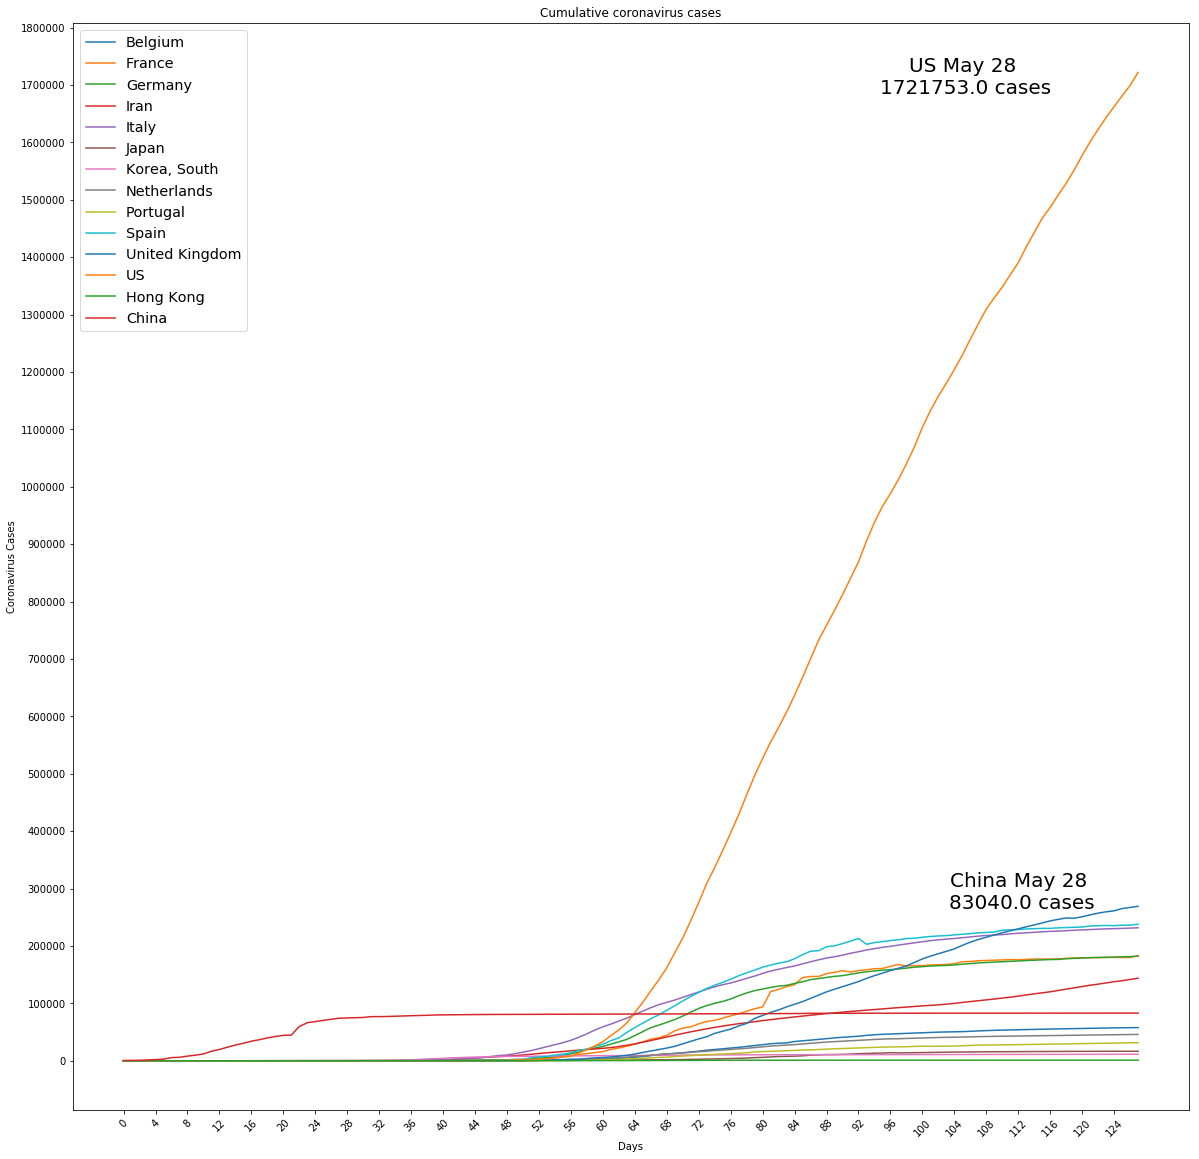

In [35]:
dataTransposed = dataCountries.transpose()

header_row = 0
dataTransposed.columns = dataTransposed.iloc[header_row]
dataTransposed = dataTransposed.drop(['Country/Region'], axis=0)

days = []
for day in range(dataTransposed.index.size):
    days.append(day)

############################################## Figure ######################################################################
fig, ax = plt.subplots()


for col in dataTransposed.columns :
    dataTransposed.plot(kind='line',x=dataTransposed.index,y=col,ax=ax)


ax.set_xlabel("Days")
ax.set_ylabel("Coronavirus Cases")
fig.set_size_inches(20, 20)

# To specify the number of ticks on both or any single axes
plt.locator_params(axis='y', nbins=20)

plt.text(0.80, 0.95, ('US May 28 '+'\n'+str(dataTransposed.iloc[dataTransposed.index.size-1]['US'])+' cases'),
         horizontalalignment='center',
         verticalalignment='center',
         transform=ax.transAxes,
         fontsize=20)


plt.text(0.85, 0.20, ('China May 28 '+'\n'+str(dataTransposed.iloc[dataTransposed.index.size-1]['China'])+' cases'),
         horizontalalignment='center',
         verticalalignment='center',
         transform=ax.transAxes,
         fontsize=20)


# only print one over four of the days since the beginning
ax.set_xticks(days[::4])
ax.set_xticklabels(days[::4], rotation=45)



ax.set_title('Cumulative coronavirus cases')
ax.legend(loc = 'upper left',fontsize='x-large')
plt.show()

---
# Elément complémentaire

Si nous ajoutons plus de données relatives aux pays étudiés nous pourrions réaliser un grand nombre de comparaisons entre pays.

Un exemple : On peut comparer l'efficacité du confinement dans les pays qui ont appliqués un confinement strict, prenons la France et l'Italie. On peut facilement obtenir les dates de début de confinement ainsi que ne nombre de décès liés aux cas de coronavirus, ainsi qu'une multitude de facteurs démographiques. Avec un tel corpus de données, nous pourrions mener des tests statistiques suivants le modèle linéaire général. Probablement une régression linéaire multiple dans notre cas et ainsi voir si le nombre de jour passé depuis le début du confinement explique bien la stagnation du nombre de cas puis sa diminution.

Étant donné la complexité d'une telle étude et le risque d'erreur d'interprétation et de calcul, ce serait prétentieux que de prétendre pouvoir conduire un tel test. Cependant, il est probable que de tels tests aient été menés par l'OMS ou les agences nationales de santé.

# Conclusion 

Ce notebook présente la méthode employée afin de réaliser la figure ci-dessus **Cumulative coronavirus cases**. Les principales difficultés consistent à correctement regrouper les données dans un même jeu de données puis de les afficher de façon lisible dans un graphique. Ce notebook ne présente aucun algorithme complexe, mais nécessite une bonne connaissance des librairies python tel que *pyplot* et *pandas*.

# Référence 

* [Matplotlib](https://matplotlib.org/3.1.0/index.html)
* [Pandas](https://pandas.pydata.org/docs/)
